# LENET MODEL for Classification with PyTorch

‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏°‡∏≤‡∏•‡∏≠‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á LENET MODEL ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô CNN model ‡∏ï‡∏±‡∏ß‡πÅ‡∏£‡∏Å‡πÜ ‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡∏ç‡πà‡∏Ç‡∏∂‡πâ‡∏ô‡∏°‡∏≤‡∏à‡∏≤‡∏Å simple CNN ‡∏≠‡∏µ‡∏Å‡∏´‡∏ô‡πà‡∏≠‡∏¢ ‡πÉ‡∏ä‡πâ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏á‡∏≤‡∏ô classification

‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
1. data exploration
2. data correction
3. data preparation
4. load data
5. define model architecture
6. train model
7. K-fold cross validation
8. visualize feature map
9. mode evaluation

In [ ]:
import torch.nn as nn
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
import shutil
from PIL import ImageFile
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA EXPLORATION

## Section 1: Exploring Image Data

‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ï‡∏•‡∏≠‡∏î‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡∏´‡∏±‡∏î‡∏ô‡∏µ‡πâ ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏´‡∏≤‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ ‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏¥‡πà‡∏á‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡∏™‡∏π‡πà‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÇ‡∏î‡∏¢‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÇ‡∏´‡∏•‡∏î‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á ‡∏ô‡∏≥‡∏°‡∏≤‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏ö‡∏≤‡∏á‡∏™‡πà‡∏ß‡∏ô ‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏û‡∏≤‡∏∞ ‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏ï‡πà‡∏≠‡πÑ‡∏õ‡∏ô‡∏µ‡πâ:

1. **Image Resolution**: ‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û (‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Å‡∏ß‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏π‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏•) ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏Ç‡∏ô‡∏≤‡∏î‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏¥‡πà‡∏á‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏•‡πà‡∏ß‡∏á‡∏´‡∏ô‡πâ‡∏≤‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á‡∏≠‡∏¥‡∏ô‡∏û‡∏∏‡∏ï‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡∏Ç‡∏ô‡∏≤‡∏î‡∏†‡∏≤‡∏û‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏à‡∏≤‡∏Å‡∏Ç‡∏ô‡∏≤‡∏î‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏£‡∏±‡∏ö‡πÄ‡∏Ç‡πâ‡∏≤ ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡∏†‡∏≤‡∏û‡∏Å‡πà‡∏≠‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤ ‡∏ã‡∏∂‡πà‡∏á‡∏à‡∏∞‡∏™‡πà‡∏á‡∏ú‡∏•‡∏ï‡πà‡∏≠‡∏£‡∏≤‡∏¢‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏à‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÑ‡∏õ
2. **Aspect Ratio**: ‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û (‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Å‡∏ß‡πâ‡∏≤‡∏á‡∏ï‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏π‡∏á) ‡∏ö‡∏≠‡∏Å‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ß‡πà‡∏≤‡∏†‡∏≤‡∏û‡∏Å‡∏ß‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏π‡∏á‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà ‡∏´‡∏≤‡∏Å‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏Å‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏†‡∏≤‡∏û‡∏à‡∏∞‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡∏†‡∏≤‡∏û‡∏™‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏à‡∏ï‡∏∏‡∏£‡∏±‡∏™ ‡πÅ‡∏ï‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏†‡∏≤‡∏û‡∏™‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏ú‡∏∑‡∏ô‡∏ú‡πâ‡∏≤‡πÅ‡∏ô‡∏ß‡∏ô‡∏≠‡∏ô ‡∏´‡∏£‡∏∑‡∏≠‡πÅ‡∏ô‡∏ß‡∏ï‡∏±‡πâ‡∏á ‡∏ã‡∏∂‡πà‡∏á‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏†‡∏≤‡∏û‡∏à‡∏ï‡∏∏‡∏£‡∏±‡∏™ ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏£‡∏∞‡∏ß‡∏±‡∏á ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡πÉ‡∏ô‡∏†‡∏≤‡∏û‡∏≠‡∏≤‡∏à‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡πÅ‡∏õ‡∏•‡∏Å‡∏à‡∏≤‡∏Å‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏õ‡πá‡∏ô‡∏à‡∏£‡∏¥‡∏á ‡πÅ‡∏•‡∏∞‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ô‡∏≥‡πÑ‡∏õ‡∏™‡∏≠‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡πâ‡∏ß ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏≠‡∏≤‡∏à‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡∏ô‡∏±‡πâ‡∏ô‡∏ú‡∏¥‡∏î‡πÑ‡∏õ
3. **Statistics of Brightness**: ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ß‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÇ‡∏î‡∏¢‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡πÄ‡∏ä‡πà‡∏ô ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ ‡∏Ñ‡πà‡∏≤‡∏°‡∏±‡∏ò‡∏¢‡∏ê‡∏≤‡∏ô ‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏°‡∏Ç‡∏≠‡∏á‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏• ‡∏ã‡∏∂‡πà‡∏á‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏™‡∏≠‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÄ‡∏ä‡πà‡∏ô ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ß‡πà‡∏≤‡∏á ‡∏´‡∏£‡∏∑‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏°‡∏ä‡∏±‡∏î‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û ‡∏ã‡∏∂‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ô‡∏≥‡πÑ‡∏õ‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£ Normalize ‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û ‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏°‡πÅ‡∏™‡∏á‡πÅ‡∏ö‡∏ö Standardized data ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô ‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏°‡πÅ‡∏™‡∏á‡πÅ‡∏ö‡∏ö Max-Min Normalize ‡∏ã‡∏∂‡πà‡∏á‡πÉ‡∏ä‡πâ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤‡πÅ‡∏™‡∏á‡∏Ç‡∏≠‡∏á‡∏à‡∏∏‡∏î‡∏†‡∏≤‡∏û‡∏´‡∏£‡∏∑‡∏≠‡∏û‡∏¥‡∏Å‡πÄ‡∏ã‡∏•‡∏†‡∏≤‡∏û‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÉ‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û (image dataset)
4. **Color Channels**: ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ä‡πà‡∏≠‡∏á‡∏™‡∏µ (‡πÄ‡∏ä‡πà‡∏ô RGB) ‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÉ‡∏´‡πâ‡πÅ‡∏ô‡πà‡πÉ‡∏à‡∏ß‡πà‡∏≤‡∏†‡∏≤‡∏û‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ä‡πà‡∏≠‡∏á‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏ß‡πà‡∏≤‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏µ‡∏ñ‡∏π‡∏Å‡πÅ‡∏à‡∏Å‡∏à‡πà‡∏≤‡∏¢‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£
5. **Class Distribution**: ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏≤‡∏™‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏°‡∏î‡∏∏‡∏• (Balanced Classes) ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏™‡∏°‡∏î‡∏∏‡∏• (Imbalanced Classes) ‡πÉ‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏°‡∏î‡∏∏‡∏•‡∏à‡∏∞‡∏°‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏≤‡∏™‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ô ‡πÉ‡∏ô‡∏Ç‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏™‡∏°‡∏î‡∏∏‡∏•‡∏à‡∏∞‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å ‡∏ã‡∏∂‡πà‡∏á‡∏≠‡∏≤‡∏à‡∏™‡πà‡∏á‡∏ú‡∏•‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
6. **Data Partitioning**: ‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏∏‡∏î train, test, validate ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤ seed ‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á ‡∏à‡∏∞‡∏™‡πà‡∏á‡∏ú‡∏•‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏∏‡πà‡∏°‡∏†‡∏≤‡∏û‡πÑ‡∏õ‡∏¢‡∏±‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡∏∏‡∏î‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô ‡∏Ñ‡∏ß‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ú‡∏•‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ß‡πà‡∏≤‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡πà‡∏á‡∏ú‡∏•‡∏ï‡πà‡∏≠‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£ ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏™‡∏∏‡πà‡∏°‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á ‡πÅ‡∏•‡∏∞‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î

‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡∏Ç‡πâ‡∏≤‡∏á‡∏ï‡πâ‡∏ô‡∏ô‡∏µ‡πâ ‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û‡πÄ‡∏ä‡∏¥‡∏á‡∏•‡∏∂‡∏Å‡∏¢‡∏¥‡πà‡∏á‡∏Ç‡∏∂‡πâ‡∏ô ‡∏î‡∏±‡∏á‡∏ô‡∏±‡πâ‡∏ô‡πÄ‡∏£‡∏≤‡∏Ñ‡∏ß‡∏£‡∏ó‡∏≥ data exploration ‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡πÄ‡∏ö‡∏∑‡πâ‡∏≠‡∏á‡∏ï‡πâ‡∏ô ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ß‡∏≤‡∏á‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• data correction ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°  ‡∏Å‡πà‡∏≠‡∏ô‡∏ô‡∏≥‡πÑ‡∏õ‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡πà‡∏≠‡πÑ‡∏õ



In [ ]:
!curl -L -o THFOOD4.zip https://github.com/NextGen-AI-Camp/curriculum/releases/download/Dataset/THFOOD4.zip
!unzip -o  THFOOD4.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  149M  100  149M    0     0  55.6M      0  0:00:02  0:00:02 --:--:-- 99.4M
Archive:  THFOOD4.zip
   creating: THFOOD4/GaengJued/
  inflating: THFOOD4/GaengJued/001.jpg  
  inflating: THFOOD4/GaengJued/002.jpg  
  inflating: THFOOD4/GaengJued/003.jpg  
  inflating: THFOOD4/GaengJued/004.jpg  
  inflating: THFOOD4/GaengJued/005.jpg  
  inflating: THFOOD4/GaengJued/006.jpg  
  inflating: THFOOD4/GaengJued/007.jpg  
  inflating: THFOOD4/GaengJued/008.jpg  
  inflating: THFOOD4/GaengJued/009.jpg  
  inflating: THFOOD4/GaengJued/010.jpg  
  inflating: THFOOD4/GaengJued/011.jpg  
  inflating: THFOOD4/GaengJued/012.jpg  
  inflating: THFOOD4/GaengJued/013.jpg  
  inflating: THFOOD4/GaengJued/015.jpg  
  inflating: THFOOD4/GaengJued/016.jpg  
  inflating: TH

## Utility Functions for Data Exploration

‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ ‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û ‡∏ó‡∏µ‡πà‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÅ‡∏¢‡∏Å‡πÄ‡∏õ‡πá‡∏ô train test validate ‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û:

1. **Get Path of All Image Files**: ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏î‡∏∂‡∏á‡∏û‡∏≤‡∏ò‡∏Ç‡∏≠‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÉ‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏û‡∏≤‡∏ò‡∏Ç‡∏≠‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏†‡∏≤‡∏û‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏Ç‡πâ‡∏≤‡∏ñ‡∏∂‡∏á‡πÅ‡∏•‡∏∞‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Å‡∏±‡∏ö‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ‡∏™‡∏∞‡∏î‡∏ß‡∏Å‡∏¢‡∏¥‡πà‡∏á‡∏Ç‡∏∂‡πâ‡∏ô

2. **Split Files into Train, Test, Validate Sets**: ‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏≤‡∏°‡∏™‡πà‡∏ß‡∏ô ‡πÑ‡∏î‡πâ‡πÅ‡∏Å‡πà ‡∏ä‡∏∏‡∏î‡∏ù‡∏∂‡∏Å (train), ‡∏ä‡∏∏‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á (validate), ‡πÅ‡∏•‡∏∞‡∏ä‡∏∏‡∏î‡∏ó‡∏î‡∏™‡∏≠‡∏ö (test) ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ seed ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏∞‡∏ö‡∏ö‡πÅ‡∏•‡∏∞‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ú‡∏•‡∏Å‡∏£‡∏∞‡∏ó‡∏ö‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡πà‡∏≠‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô ‡πÄ‡∏°‡∏∑‡πà‡∏≠ seed ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÑ‡∏õ‡πÑ‡∏î‡πâ

3. **Count the Number of class images in each split**: ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡πÅ‡∏ö‡πà‡∏á‡πÑ‡∏õ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÅ‡∏•‡∏∞‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏°‡∏î‡∏∏‡∏•‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏î‡πâ

4. **Center Crop to Preserve Aspect Ratio**: ‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡∏î‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å‡∏Å‡∏∂‡πà‡∏á‡∏Å‡∏•‡∏≤‡∏á‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏£‡∏±‡∏Å‡∏©‡∏≤‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡∏™‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏à‡∏±‡∏ï‡∏∏‡∏£‡∏±‡∏™ ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡∏£‡∏±‡∏Å‡∏©‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏Å‡∏≤‡∏£‡∏ö‡∏¥‡∏î‡πÄ‡∏ö‡∏∑‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡πÉ‡∏ô‡∏†‡∏≤‡∏û‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏ú‡∏¥‡∏î‡πÄ‡∏û‡∏µ‡πâ‡∏¢‡∏ô‡πÑ‡∏õ

5. **Calculate Image Statistics for each split**: ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô ‡πÄ‡∏ä‡πà‡∏ô ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ß‡πà‡∏≤‡∏á‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏™‡∏µ‡πÄ‡∏ó‡∏≤‡πÅ‡∏•‡∏∞‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡πà‡∏≠‡∏á‡∏™‡∏µ‡πÅ‡∏î‡∏á/‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß/‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô ‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô

6. **Visualize Data**: ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏°‡∏≠‡∏á‡πÄ‡∏´‡πá‡∏ô‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ä‡∏±‡∏î‡πÄ‡∏à‡∏ô ‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏Å‡∏£‡∏≤‡∏ü‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û

‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏™‡∏≥‡∏£‡∏ß‡∏à‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡∏ñ‡∏µ‡πà‡∏ñ‡πâ‡∏ß‡∏ô ‡πÅ‡∏•‡∏∞‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÄ‡∏ä‡∏¥‡∏á‡∏•‡∏∂‡∏Å‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û


In [ ]:
# Utility
def copy_files_to_new_folders(original_dataset_dir, train_files, test_files, val_files):
    splits = [('train', train_files), ('test', test_files), ('val', val_files)]
    for split_name, files in splits:
        split_dir = os.path.join(original_dataset_dir, split_name)
        for file_path in files:
            class_name = os.path.basename(os.path.dirname(file_path))
            new_file_path = os.path.join(split_dir, class_name, os.path.basename(file_path))
            os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
            shutil.copyfile(file_path, new_file_path)

def get_file_paths(dataset_dir):
    subdirs = [os.path.join(dataset_dir, d) for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

    file_paths = []
    for subdir in subdirs:
        file_paths.extend(glob(os.path.join(subdir, '*')))

    return file_paths

def split_dataset(file_paths, train_size=0.7, val_size=0.2,seed=42):
    train_files, test_files = train_test_split(file_paths, train_size=train_size, random_state=seed)
    train_files, val_files = train_test_split(train_files, test_size=val_size, random_state=seed)
    return train_files, test_files, val_files

def count_classes(file_list):
    class_counts = {}
    for file_path in file_list:
        class_name = os.path.basename(os.path.dirname(file_path))
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
    return class_counts

def center_crop_image(img, target_size=(64, 64)):
    new_dim = target_size[0] + 3

    if img.shape[1] > img.shape[0]:
        aspect_ratio = img.shape[1] / img.shape[0]
        new_width = int(new_dim * aspect_ratio)
        resized_img = cv2.resize(img, (new_width, new_dim))
    else:
        aspect_ratio = img.shape[1] / img.shape[0]
        new_height = int(new_dim / aspect_ratio)
        resized_img = cv2.resize(img, (new_dim, new_height))

    width, height = resized_img.shape[1], resized_img.shape[0]
    crop_width = min(target_size[0], width)
    crop_height = min(target_size[1], height)
    mid_x, mid_y = width // 2, height // 2
    cw2, ch2 = crop_width // 2, crop_height // 2

    cropped_img = resized_img[mid_y - ch2: mid_y + ch2, mid_x - cw2: mid_x + cw2]

    return cropped_img

def prepare_data(dataset_dir,seed=42):
    file_paths = get_file_paths(dataset_dir)
    train_files, test_files, val_files = split_dataset(file_paths, train_size=0.7, val_size=0.2,seed=seed)
    print("Training files:", len(train_files))
    print("Testing files:", len(test_files))
    print("Validation files:", len(val_files))
    train_counts = count_classes(train_files)
    test_counts = count_classes(test_files)
    val_counts = count_classes(val_files)
    print("Training files per class:", train_counts)
    print("Testing files per class:", test_counts)
    print("Validation files per class:", val_counts)
    return [train_files, test_files, val_files]

def explore(image_paths,center_crop=False):
    dataset_width = []
    dataset_height = []
    dataset_channels = []
    dataset_aspect_ratio = []
    avg_brightness_gray =[]
    avg_brightness_r = []
    avg_brightness_g = []
    avg_brightness_b = []

    for filename in image_paths:
        img = cv2.imread(filename)
        if center_crop:
            img = center_crop_image(img)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w, c = img.shape
            dataset_width.append(w)
            dataset_height.append(h)
            dataset_channels.append(c)
            dataset_aspect_ratio.append(w / h)
            red = np.mean(img[...,0])
            avg_brightness_r.append(red)
            green = np.mean(img[...,1])
            avg_brightness_g.append(green)
            blue = np.mean(img[...,2])
            avg_brightness_b.append(blue)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            avg_brightness_gr = np.mean(gray)
            avg_brightness_gray.append(avg_brightness_gr)
    return dataset_width,dataset_height,dataset_channels,dataset_aspect_ratio,avg_brightness_gray,avg_brightness_r,avg_brightness_g,avg_brightness_b

def compute_max_values(datasets):
    max_width = max_height = max_aspect_ratio = max_brightness_gray = max_brightness_rgb = float('-inf')

    for dataset in datasets:
        dataset_width, dataset_height, _, dataset_aspect_ratio, avg_brightness_gray, avg_brightness_r, avg_brightness_g, avg_brightness_b = explore(dataset)

        max_width = max(max_width, max(dataset_width))
        max_height = max(max_height, max(dataset_height))
        max_aspect_ratio = max(max_aspect_ratio, max(dataset_aspect_ratio))
        max_brightness_gray = max(max_brightness_gray, max(avg_brightness_gray))
        max_brightness_rgb = max(max_brightness_rgb, max(avg_brightness_r), max(avg_brightness_g), max(avg_brightness_b))

    return max_width, max_height, max_aspect_ratio, max_brightness_gray, max_brightness_rgb

def summary(dataset_dir,seed,center_crop=False):
    train_files, test_files, val_files = prepare_data(dataset_dir, seed=seed)
    max_len = 0
    for ele in [train_files, test_files, val_files]:
        max_len = max(max_len, len(ele))
    max_width, max_height, max_aspect_ratio, max_brightness_gray, max_brightness_rgb = compute_max_values([train_files, test_files, val_files])

    row_labels = ['Train', 'Test', 'Val']
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
    fig.suptitle(f'Dataset Exploration: Train, Test, and Validation Sets\nSEED: {seed}', fontsize=20, weight='bold')
    font_size = 6
    title_font_size = font_size + 2
    for index, dataset in enumerate([train_files, test_files, val_files]):
        dataset_width, dataset_height, _, dataset_aspect_ratio, avg_brightness_gray, avg_brightness_r, avg_brightness_g, avg_brightness_b = explore(dataset,center_crop=center_crop)

        ax[index, 0].scatter(dataset_width, dataset_height, marker='x',)
        ax[index, 0].plot([0, max_width+200], [0, max_width+200], color='red', label='aspect ratio = 1')
        ax[index, 0].legend(fontsize=font_size)
        ax[index, 0].set_xlim([0, max(max_width,max_height)+50])
        ax[index, 0].set_ylim([0, max(max_width,max_height)+50])
        ax[index, 0].tick_params(axis='both', labelsize=font_size)
        ax[index, 0].set_xlabel('Width', fontsize=font_size)
        ax[index, 0].set_ylabel('Height', fontsize=font_size)
        ax[index, 0].set_title('Scatter Plot of Dataset Width and Height', fontsize=font_size)

        ax[index, 1].hist(dataset_aspect_ratio)
        ax[index, 1].set_ylim([0, max_len+50])
        ax[index, 1].tick_params(axis='both', labelsize=font_size)
        ax[index, 1].set_xlabel('Aspect Ratio', fontsize=font_size)
        ax[index, 1].set_ylabel('Frequency', fontsize=font_size)
        ax[index, 1].set_title('Aspect Ratio Distribution', fontsize=font_size)

        ax[index, 2].boxplot(avg_brightness_gray, vert=False, patch_artist=True, showmeans=True)
        ax[index, 2].set_xlim([0, max_brightness_gray+50])
        ax[index, 2].tick_params(axis='both', labelsize=font_size)
        ax[index, 2].set_xlabel("Average Brightness", fontsize=font_size)
        ax[index, 2].set_title("Box Plot of Average Brightness for Images", fontsize=font_size)

        ax[index, 3].boxplot([avg_brightness_r, avg_brightness_g, avg_brightness_b], vert=False, patch_artist=True, showmeans=True)
        ax[index, 3].set_xlim([0, max_brightness_rgb+50])
        ax[index, 3].tick_params(axis='both', labelsize=font_size)
        ax[index, 3].set_xlabel("Average Brightness", fontsize=font_size)
        ax[index, 3].set_yticklabels(['R', 'G', 'B'], fontsize=font_size)
        ax[index, 3].set_title("Box Plot of Average Brightness for Images", fontsize=font_size)

        ax[index, 0].text(-0.5, 0.5, row_labels[index],  fontsize=font_size, weight='bold', transform=ax[index, 0].transAxes)

    plt.tight_layout()
    plt.show()

Training files: 1028
Testing files: 552
Validation files: 257
Training files per class: {'YamWoonSen': 282, 'KkaoKlukKaphi': 247, 'GoongPao': 252, 'GaengJued': 247}
Testing files per class: {'GoongPao': 135, 'KkaoKlukKaphi': 136, 'GaengJued': 149, 'YamWoonSen': 132}
Validation files per class: {'GoongPao': 56, 'GaengJued': 72, 'KkaoKlukKaphi': 65, 'YamWoonSen': 64}


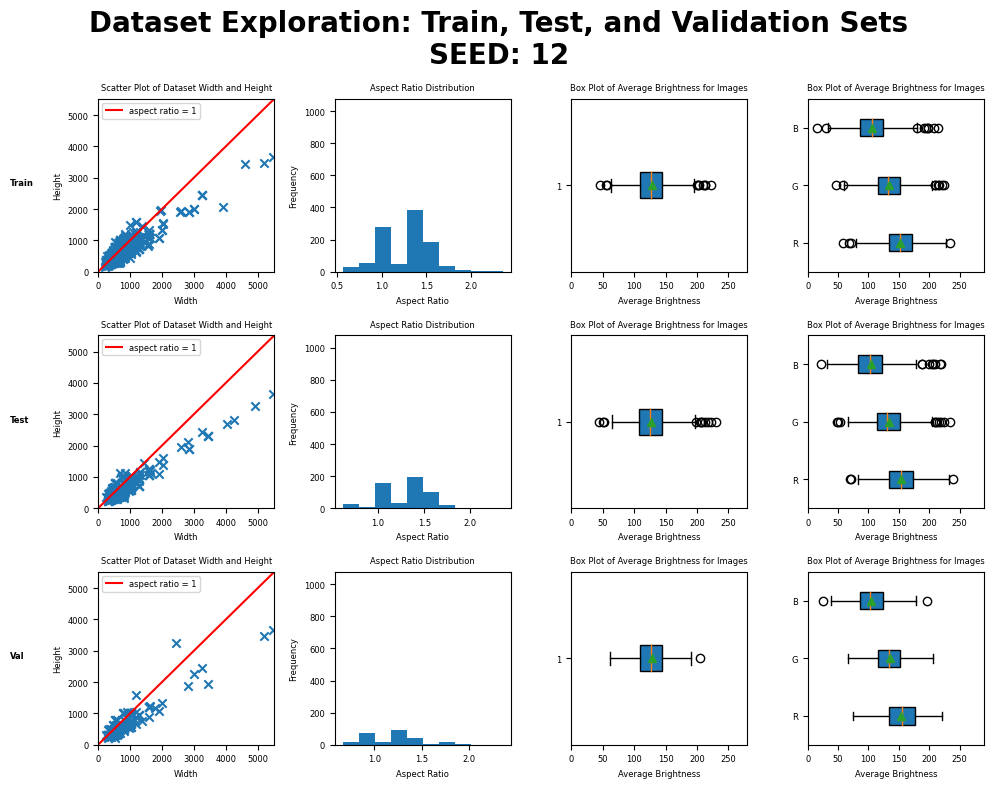

Training files: 1028
Testing files: 552
Validation files: 257
Training files per class: {'GoongPao': 243, 'GaengJued': 267, 'YamWoonSen': 261, 'KkaoKlukKaphi': 257}
Testing files per class: {'GaengJued': 139, 'YamWoonSen': 146, 'KkaoKlukKaphi': 139, 'GoongPao': 128}
Validation files per class: {'GoongPao': 72, 'GaengJued': 62, 'KkaoKlukKaphi': 52, 'YamWoonSen': 71}


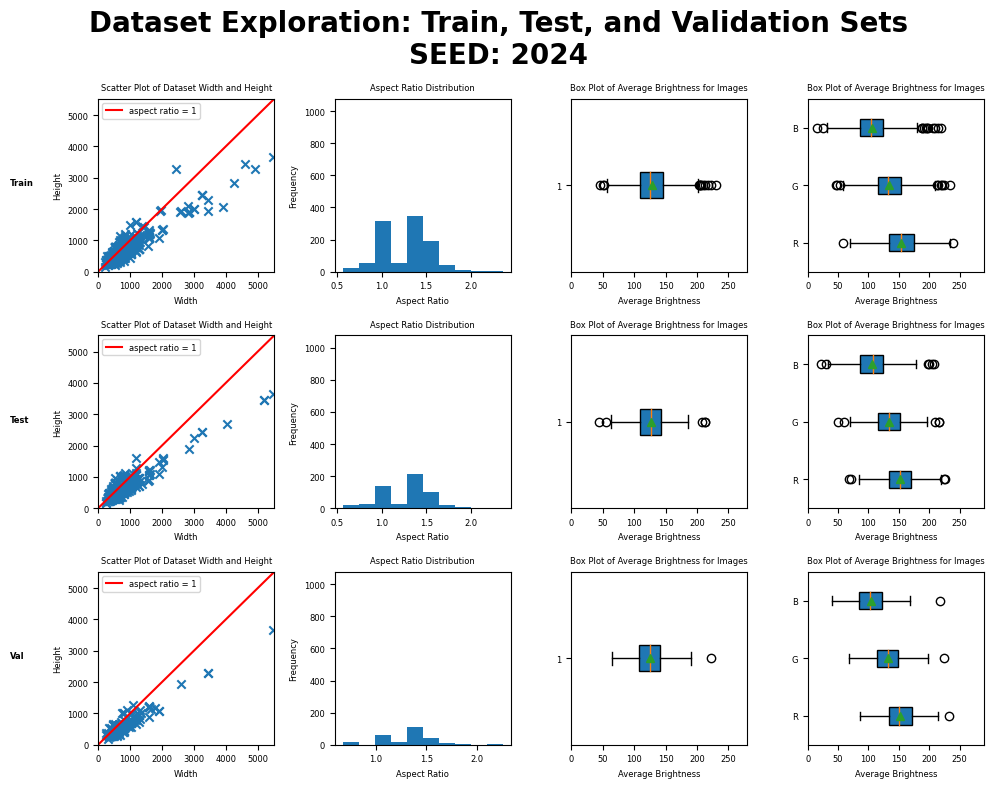

Training files: 1028
Testing files: 552
Validation files: 257
Training files per class: {'KkaoKlukKaphi': 240, 'YamWoonSen': 274, 'GoongPao': 252, 'GaengJued': 262}
Testing files per class: {'YamWoonSen': 134, 'GaengJued': 136, 'KkaoKlukKaphi': 148, 'GoongPao': 134}
Validation files per class: {'YamWoonSen': 70, 'KkaoKlukKaphi': 60, 'GaengJued': 70, 'GoongPao': 57}


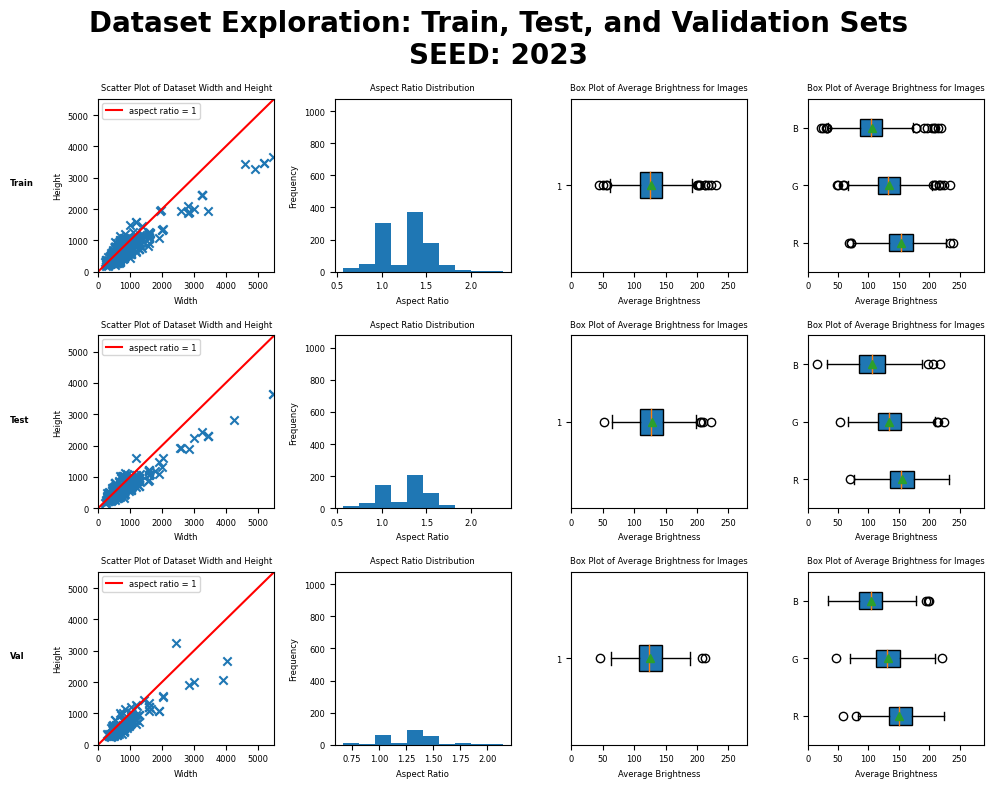

In [ ]:
dataset_dir = "/content/THFOOD4"
summary(dataset_dir,12)
summary(dataset_dir,2024)
summary(dataset_dir,2023)


Training files: 1028
Testing files: 552
Validation files: 257
Training files per class: {'YamWoonSen': 282, 'KkaoKlukKaphi': 247, 'GoongPao': 252, 'GaengJued': 247}
Testing files per class: {'GoongPao': 135, 'KkaoKlukKaphi': 136, 'GaengJued': 149, 'YamWoonSen': 132}
Validation files per class: {'GoongPao': 56, 'GaengJued': 72, 'KkaoKlukKaphi': 65, 'YamWoonSen': 64}


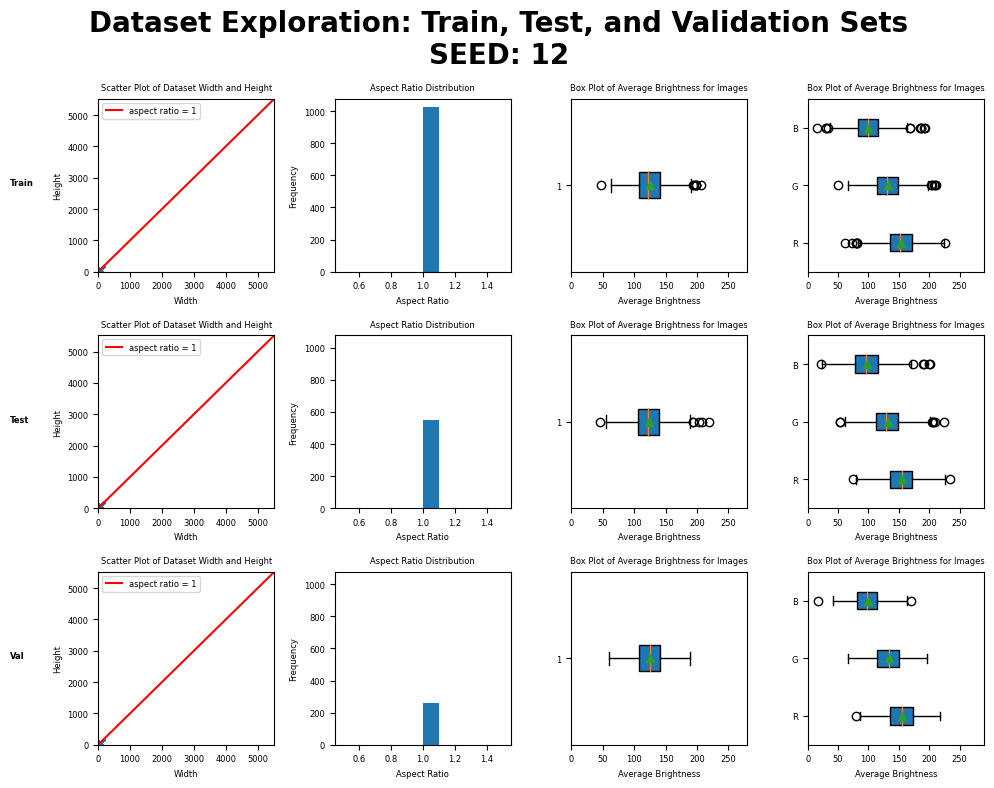

In [ ]:
dataset_dir = "/content/THFOOD4"
summary(dataset_dir,12,center_crop=True)

# DATA CORRECTION
- ASPECT RATIO ‚Üí CENTER CROP


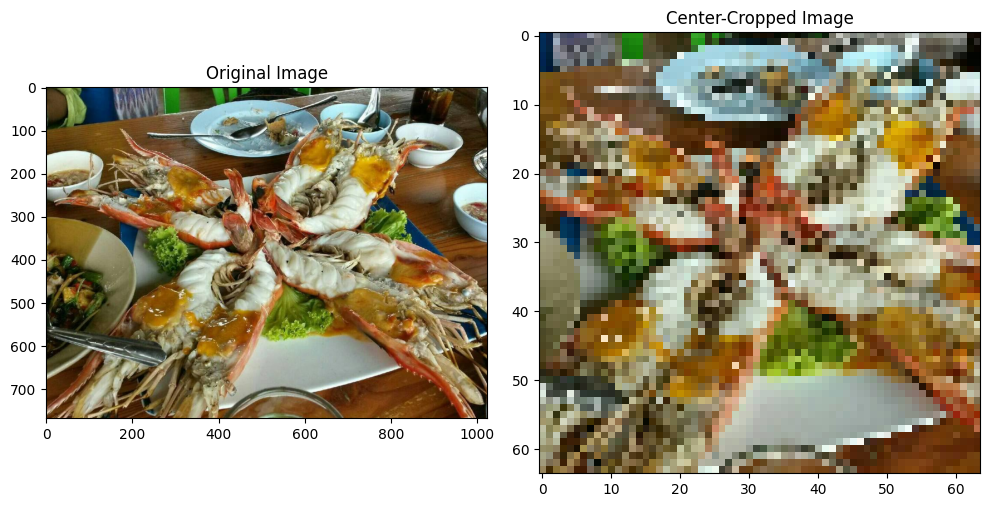

In [ ]:
og_img = cv2.imread('/content/THFOOD4/GoongPao/091.jpg')
og_img = cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)
img = center_crop_image(og_img,(64,64))
ig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(og_img)
ax[0].set_title('Original Image')

# Display the center-cropped image
ax[1].imshow(img)
ax[1].set_title('Center-Cropped Image')


plt.tight_layout()
plt.show()

In [ ]:
seed = 12
dataset_dir = "/content/THFOOD4"
train_files, test_files, val_files = prepare_data(dataset_dir, seed=seed)

copy_files_to_new_folders(f'/content/seed{seed}', train_files, test_files, val_files)

Training files: 1028
Testing files: 552
Validation files: 257
Training files per class: {'YamWoonSen': 282, 'KkaoKlukKaphi': 247, 'GoongPao': 252, 'GaengJued': 247}
Testing files per class: {'GoongPao': 135, 'KkaoKlukKaphi': 136, 'GaengJued': 149, 'YamWoonSen': 132}
Validation files per class: {'GoongPao': 56, 'GaengJued': 72, 'KkaoKlukKaphi': 65, 'YamWoonSen': 64}


---

# DATA PREPARATION
‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡πÅ‡∏•‡∏∞‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠ ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô ‡∏´‡∏ô‡∏∂‡πà‡∏á‡πÉ‡∏ô‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ñ‡∏∑‡∏≠ Data Augmentation

### Data Augmentation

‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡∏†‡∏≤‡∏û‡∏ï‡πâ‡∏ô‡∏â‡∏ö‡∏±‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡∏†‡∏≤‡∏û‡πÉ‡∏´‡∏°‡πà‡∏î‡πâ‡∏ß‡∏¢‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡∏ã‡∏∂‡πà‡∏á‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÅ‡∏•‡∏∞‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏ô‡∏ó‡∏≤‡∏ô‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ ‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡πÑ‡∏î‡πâ‡∏´‡∏•‡∏≤‡∏¢‡∏ß‡∏¥‡∏ò‡∏µ ‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ:

1. **Random Resize**: ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÅ‡∏ö‡∏ö‡∏™‡∏∏‡πà‡∏° ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô ‡∏ß‡∏¥‡∏ò‡∏µ‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Å‡∏±‡∏ö‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô
2. **Padding**: ‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏¥‡∏°‡∏Ç‡∏≠‡∏ö‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö‡∏†‡∏≤‡∏û ‡∏≠‡∏≤‡∏à‡πÉ‡∏ä‡πâ‡∏™‡∏µ‡∏î‡∏≥‡∏´‡∏£‡∏∑‡∏≠‡∏™‡∏µ‡∏≠‡∏∑‡πà‡∏ô‡πÜ ‡∏Ç‡∏∂‡πâ‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏Å‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ ‡πÉ‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö reflect padding ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏¥‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ô‡∏≠‡∏Å‡∏Å‡∏£‡∏≠‡∏Å‡∏†‡∏≤‡∏û‡πÄ‡∏î‡∏¥‡∏° ‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏ö‡∏ö‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Å‡∏£‡∏∞‡∏à‡∏Å‡∏™‡∏∞‡∏ó‡πâ‡∏≠‡∏ô ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ô‡∏≥‡πÑ‡∏õ random affine transform ‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡∏•‡πâ‡∏ô‡∏ô‡∏≠‡∏Å‡∏Å‡∏£‡∏≠‡∏ö‡∏†‡∏≤‡∏û‡πÄ‡∏î‡∏¥‡∏° ‡∏à‡∏∞‡∏°‡∏µ‡πÄ‡∏ô‡∏∑‡πâ‡∏≠‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÄ‡∏ï‡∏¥‡∏°‡∏ï‡∏¥‡∏î‡πÑ‡∏õ ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÑ‡∏°‡πà‡πÄ‡∏û‡∏µ‡πâ‡∏¢‡∏ô‡πÑ‡∏õ‡∏°‡∏≤‡∏Å ‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏¥‡∏°‡∏î‡πâ‡∏ß‡∏¢‡∏®‡∏π‡∏ô‡∏¢‡πå (zero padding)
3. **RandomAffine**: ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡∏†‡∏≤‡∏û‡πÅ‡∏ö‡∏ö Affine Transformation ‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏ä‡∏¥‡∏á‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏£‡∏±‡∏Å‡∏©‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ç‡∏ô‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡πÄ‡∏™‡πâ‡∏ô‡∏ï‡∏£‡∏á‡πÑ‡∏ß‡πâ ‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏£‡∏ß‡∏°‡∏ñ‡∏∂‡∏á‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á‡πÅ‡∏ö‡∏ö‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡∏´‡∏•‡∏≤‡∏¢‡πÅ‡∏ö‡∏ö‡∏ã‡∏∂‡πà‡∏á‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡πÑ‡∏î‡πâ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡∏™‡∏∏‡πà‡∏°‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå ‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ:
   - **‡∏Å‡∏≤‡∏£‡∏´‡∏°‡∏∏‡∏ô (Rotation)**: ‡∏Å‡∏≤‡∏£‡∏´‡∏°‡∏∏‡∏ô‡∏†‡∏≤‡∏û‡∏ï‡∏≤‡∏°‡∏°‡∏∏‡∏°‡∏ó‡∏µ‡πà‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‡∏ã‡∏∂‡πà‡∏á‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏°‡∏∏‡∏°‡∏°‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏£‡∏±‡∏ö‡∏†‡∏≤‡∏û‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô
   - **‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô (Translation)**: ‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡πÅ‡∏ô‡∏ß‡∏ô‡∏≠‡∏ô‡πÅ‡∏•‡∏∞‡πÅ‡∏ô‡∏ß‡∏ï‡∏±‡πâ‡∏á‡∏ï‡∏≤‡∏°‡∏£‡∏∞‡∏¢‡∏∞‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏à‡∏≥‡∏•‡∏≠‡∏á‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡∏ó‡∏µ‡πà‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏ï‡πà‡∏≤‡∏á‡πÜ‡πÉ‡∏ô‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ
   - **‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î (Scaling)**: ‡∏Å‡∏≤‡∏£‡∏Ç‡∏¢‡∏≤‡∏¢‡∏´‡∏£‡∏∑‡∏≠‡∏¢‡πà‡∏≠‡∏†‡∏≤‡∏û‡∏ï‡∏≤‡∏°‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏ó‡∏µ‡πà‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ
   - **‡∏Å‡∏≤‡∏£‡πÄ‡∏â‡∏∑‡∏≠‡∏ô (Shearing)**: ‡∏Å‡∏≤‡∏£‡πÄ‡∏â‡∏∑‡∏≠‡∏ô‡∏†‡∏≤‡∏û‡∏ï‡∏≤‡∏°‡∏°‡∏∏‡∏°‡∏ó‡∏µ‡πà‡∏™‡∏∏‡πà‡∏°‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ
4. **Center Crop**: ‡∏Å‡∏≤‡∏£‡∏Ñ‡∏£‡∏≠‡∏ö‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å‡∏Å‡∏∂‡πà‡∏á‡∏Å‡∏•‡∏≤‡∏á ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏£‡∏±‡∏Å‡∏©‡∏≤‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡πÉ‡∏´‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ ‡∏ß‡∏¥‡∏ò‡∏µ‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏†‡∏≤‡∏û‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏™‡∏±‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏•‡∏∞‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ô‡∏≥‡πÑ‡∏õ‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û

data augmentation ‡∏ñ‡∏∑‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏ä‡∏ô‡πå‡∏°‡∏≤‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏ô‡∏≤‡∏î‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏°‡∏µ‡∏à‡∏≥‡∏Å‡∏±‡∏î ‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏´‡∏°‡πà‡∏ó‡∏µ‡πà‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏•‡∏î‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡∏¥‡∏î overfitting ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏à‡∏≥‡∏Å‡∏±‡∏î ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏¢‡∏∑‡∏î‡∏´‡∏¢‡∏∏‡πà‡∏ô‡∏û‡∏≠‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á ‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡πÄ‡∏™‡∏£‡∏¥‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÄ‡∏ä‡∏¥‡∏á‡∏•‡∏∂‡∏Å‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏ô‡∏±‡∏¢‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ‡πÅ‡∏•‡∏∞‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡πÉ‡∏ô‡∏™‡∏ñ‡∏≤‡∏ô‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏ó‡∏µ‡πà‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÑ‡∏î‡πâ

In [ ]:
def load_data(path,is_test=False):
    torch.manual_seed(4912)

    if is_test:
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((64, 64)),
        ])
        dataset = ImageFolder(path, transform=transform)

    else:
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((66, 66)),
        transforms.Pad(65, padding_mode='reflect'),
        transforms.RandomAffine(degrees=15, translate=(0.05, 0.05),scale=(0.8, 1.2), shear=10),
        transforms.CenterCrop(64),
        ])
        dataset = ImageFolder(path, transform=transform)
    class_names = dataset.classes
    print("class_names",class_names)
    data_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=16, pin_memory=True)

    print("üìÉDataset:")
    class_counts_train = [0] * len(class_names)
    for _, target in dataset:
        class_counts_train[target] += 1

    for class_name, class_count in zip(class_names, class_counts_train):
        print(f"\tNumber of images in class {class_name}: {class_count}")

    print(f"\tNumber of samples: {len(dataset)}")

    return dataset

In [ ]:
train_dataset = load_data('/content/seed12/train')
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=16, pin_memory=True)
test_dataset = load_data('/content/seed12/test',is_test=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=16, pin_memory=True)
val_dataset = load_data('/content/seed12/val',is_test=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=16, pin_memory=True)


class_names ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
üìÉDataset:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


	Number of images in class GaengJued: 247
	Number of images in class GoongPao: 252
	Number of images in class KkaoKlukKaphi: 247
	Number of images in class YamWoonSen: 282
	Number of samples: 1028
class_names ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
üìÉDataset:
	Number of images in class GaengJued: 149
	Number of images in class GoongPao: 135
	Number of images in class KkaoKlukKaphi: 136
	Number of images in class YamWoonSen: 132
	Number of samples: 552
class_names ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
üìÉDataset:
	Number of images in class GaengJued: 72
	Number of images in class GoongPao: 56
	Number of images in class KkaoKlukKaphi: 65
	Number of images in class YamWoonSen: 64
	Number of samples: 257


In [ ]:
def imshow_grid(images, labels, class_names):
    num_images = len(images)
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6),dpi=100)
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image = images[i].permute(1, 2, 0)
            label = labels[i].item()
            ax.imshow(torch.clamp(image,0,1))
            ax.set_title(class_names[label])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

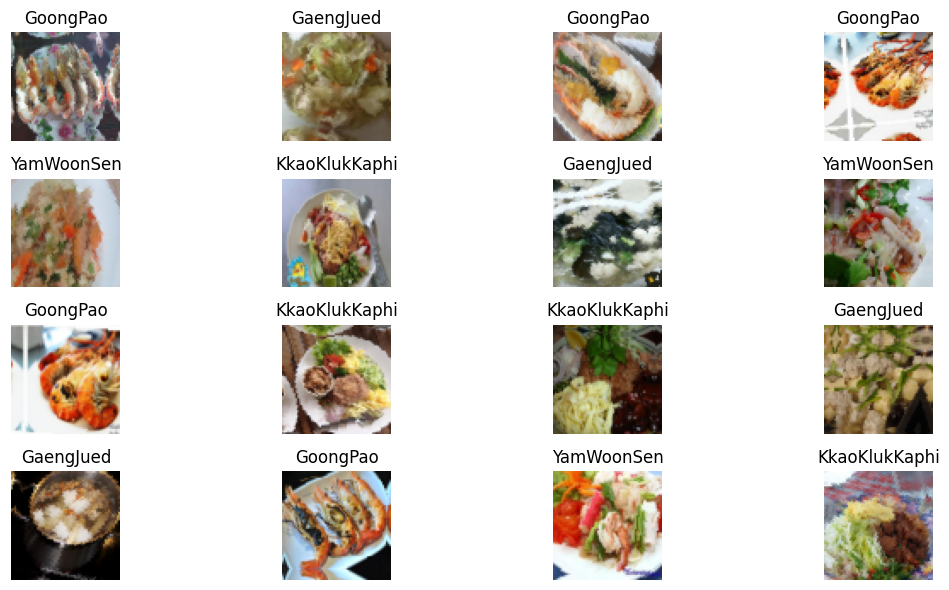

In [ ]:
class_names = ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
batch, labels = next(iter(train_loader))
imshow_grid(batch, labels, class_names)

# MODEL ARCHITECTURE
## LeNet Model Architecture

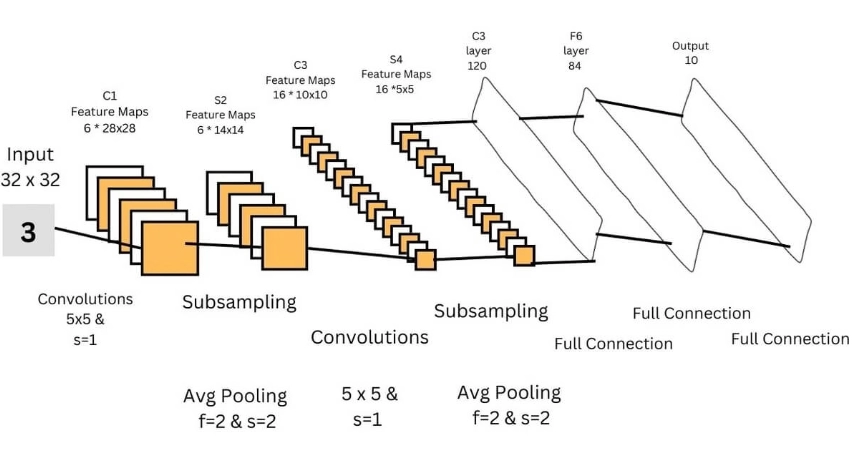

https://www.naukri.com/code360/library/lenet-5

LeNet ‡πÄ‡∏õ‡πá‡∏ô‡∏´‡∏ô‡∏∂‡πà‡∏á‡πÉ‡∏ô‡∏™‡∏ñ‡∏≤‡∏õ‡∏±‡∏ï‡∏¢‡∏Å‡∏£‡∏£‡∏°‡∏Ç‡∏≠‡∏á Convolutional Neural Network (CNN) ‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏à‡∏î‡∏à‡∏≥‡∏†‡∏≤‡∏û ‡πÇ‡∏î‡∏¢ LeNet ‡∏ñ‡∏π‡∏Å‡∏û‡∏±‡∏í‡∏ô‡∏≤‡∏Ç‡∏∂‡πâ‡∏ô‡πÇ‡∏î‡∏¢ Yann LeCun ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ì‡∏∞‡πÉ‡∏ô‡∏õ‡∏µ 1998 ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏ó‡∏µ‡πà‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏≤‡∏¢‡∏°‡∏∑‡∏≠ (MNIST dataset) ‡∏™‡∏ñ‡∏≤‡∏õ‡∏±‡∏ï‡∏¢‡∏Å‡∏£‡∏£‡∏°‡∏Ç‡∏≠‡∏á LeNet ‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏´‡∏•‡∏≤‡∏¢‡∏ä‡∏±‡πâ‡∏ô‡∏ã‡∏∂‡πà‡∏á‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏£‡πà‡∏ß‡∏°‡∏Å‡∏±‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏¢‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏û

### ‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á LeNet

LeNet ‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏´‡∏•‡∏±‡∏Å‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ:
1. **Convolutional Layer 1 (C1)**: ‡πÉ‡∏ä‡πâ kernel weights ‡∏Ç‡∏ô‡∏≤‡∏î 5x5 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 6 ‡∏ï‡∏±‡∏ß ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ 6 feature maps ‡∏Ç‡∏ô‡∏≤‡∏î 28x28 ‡∏à‡∏∞‡∏™‡∏±‡∏á‡πÄ‡∏Å‡∏ï‡∏ß‡πà‡∏≤‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏•‡∏î‡∏•‡∏á‡∏à‡∏≤‡∏Å‡∏Ç‡∏ô‡∏≤‡∏î‡∏†‡∏≤‡∏û‡∏≠‡∏¥‡∏ô‡∏û‡∏∏‡∏ó ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ padding ‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏≥ convolution ‡πÉ‡∏ô‡∏ï‡∏±‡∏ß‡∏Å‡∏£‡∏≠‡∏á
2. **Subsampling Layer 1 (S2)**: ‡πÉ‡∏ä‡πâ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ Average Pooling ‡∏Ç‡∏ô‡∏≤‡∏î 2x2 ‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î feature maps ‡∏•‡∏á‡∏Ñ‡∏£‡∏∂‡πà‡∏á‡∏´‡∏ô‡∏∂‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô 14x14
3. **Convolutional Layer 2 (C3)**: ‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡∏ô‡∏≤‡∏î 5x5 ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 16 ‡∏ï‡∏±‡∏ß ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ 16 feature maps ‡∏Ç‡∏ô‡∏≤‡∏î 10x10 (no padding ‡πÄ‡∏ä‡πà‡∏ô‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô‡∏Å‡∏±‡∏ö C1)
4. **Subsampling Layer 2 (S4)**: ‡πÉ‡∏ä‡πâ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ Average Pooling ‡∏Ç‡∏ô‡∏≤‡∏î 2x2 ‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î feature maps ‡∏•‡∏á‡∏Ñ‡∏£‡∏∂‡πà‡∏á‡∏´‡∏ô‡∏∂‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô 5x5
5. **Fully Connected Layer 1 (F5)**: ‡πÅ‡∏õ‡∏•‡∏á feature maps ‡πÄ‡∏õ‡πá‡∏ô vector ‡πÅ‡∏•‡∏∞‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠‡πÄ‡∏Ç‡πâ‡∏≤‡∏Å‡∏±‡∏ö Neuron ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 120 ‡∏ï‡∏±‡∏ß
6. **Fully Connected Layer 2 (F6)**: ‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠ Neuron ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 120 ‡∏ï‡∏±‡∏ß‡πÑ‡∏õ‡∏¢‡∏±‡∏á Neuron ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 84 ‡∏ï‡∏±‡∏ß
7. **Output Layer**: ‡πÉ‡∏ä‡πâ Softmax ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏à‡∏≥‡πÅ‡∏ô‡∏Å 10 ‡∏Ñ‡∏•‡∏≤‡∏™ (‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MNIST)

‡πÇ‡∏î‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏à‡∏≥‡∏•‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÉ‡∏ô code ‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á‡∏ô‡∏µ‡πâ ‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏†‡∏≤‡∏û‡∏≠‡∏¥‡∏ô‡∏û‡∏∏‡∏ó‡∏Ç‡∏ô‡∏≤‡∏î 64x64 ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡πÑ‡∏°‡πà‡πÄ‡∏•‡πá‡∏Å‡∏à‡∏ô‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ
### ‡∏ú‡∏•‡∏Å‡∏£‡∏∞‡∏ó‡∏ö‡∏Ç‡∏≠‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÅ‡∏•‡∏∞‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á output channel

**‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÅ‡∏•‡∏∞‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á output channel** ‡∏°‡∏µ‡∏ú‡∏•‡∏Å‡∏£‡∏∞‡∏ó‡∏ö‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å ‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á output channel ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞ Layer ‡∏ó‡∏µ‡πà‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÅ‡∏¢‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏û‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô ‡πÅ‡∏ï‡πà‡πÉ‡∏ô‡∏Ç‡∏ì‡∏∞‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô‡∏Å‡πá‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏ï‡πâ‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡∏ó‡∏£‡∏±‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡∏î‡πâ‡∏ß‡∏¢

- **‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏Ñ‡∏ß‡∏£‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡∏´‡∏£‡∏∑‡∏≠‡πÉ‡∏´‡∏ç‡πà‡∏Å‡∏ß‡πà‡∏≤‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ï‡πà‡∏≠‡∏°‡∏≤‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà?** ‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏Ñ‡∏ß‡∏£‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ï‡πà‡∏≠‡∏°‡∏≤ ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏Ñ‡∏∑‡∏≠‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡πÄ‡∏ä‡πà‡∏ô ‡∏Ç‡∏≠‡∏ö ‡πÄ‡∏™‡πâ‡∏ô ‡πÅ‡∏•‡∏∞‡∏£‡∏π‡∏õ‡∏ó‡∏£‡∏á‡∏á‡πà‡∏≤‡∏¢‡πÜ ‡πÉ‡∏ô‡∏Ç‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ï‡πà‡∏≠‡∏°‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô ‡πÄ‡∏ä‡πà‡∏ô ‡∏Å‡∏≤‡∏£‡∏£‡∏ß‡∏°‡∏Å‡∏±‡∏ô‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡∏à‡∏≤‡∏Å‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤ ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡πÄ‡∏õ‡πá‡∏ô‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏ ‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á output channel ‡πÉ‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ï‡πà‡∏≠‡∏°‡∏≤‡∏à‡∏∂‡∏á‡∏Ñ‡∏ß‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏à‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡πÑ‡∏î‡πâ‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏ä‡πà‡∏ô ‡πÉ‡∏ô LENET model ‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á output channels ‡∏´‡∏£‡∏∑‡∏≠ convolutional nodes ‡πÉ‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÅ‡∏£‡∏Å‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏à‡∏≤‡∏Å 6 channels ‡πÑ‡∏õ‡πÄ‡∏õ‡πá‡∏ô 16 channels ‡πÉ‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á ‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ç‡∏∂‡πâ‡∏ô‡∏Ç‡∏≠‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô channel ‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÅ‡∏¢‡∏Å‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡πÑ‡∏î‡πâ‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ú‡πà‡∏≤‡∏ô‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡πÑ‡∏õ

### ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏°‡∏µ‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå subsampling ‡πÄ‡∏ä‡πà‡∏ô Average / Max Pooling

‡∏Å‡∏≤‡∏£‡∏°‡∏µ‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå subsampling ‡πÄ‡∏ä‡πà‡∏ô Average / Max Pooling ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô CNN ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏ä‡∏¥‡∏á‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ç‡∏≠‡∏á‡πÅ‡∏ú‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞ ‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏ô‡∏µ‡πâ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô:
   - **‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏°‡∏¥‡∏ï‡∏¥‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•**: ‡∏•‡∏î‡∏†‡∏≤‡∏£‡∏∞‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏´‡∏ô‡πà‡∏ß‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏≥
   - **‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡πÅ‡∏ö‡∏ö‡∏û‡∏µ‡∏£‡∏∞‡∏°‡∏¥‡∏î**: ‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Å‡∏±‡∏ö‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏û‡∏µ‡∏£‡∏∞‡∏°‡∏¥‡∏î‡∏†‡∏≤‡∏û ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏†‡∏≤‡∏û‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏ ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡∏ç‡πà‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏ï‡∏±‡∏ß‡∏Å‡∏£‡∏≠‡∏á‡∏´‡∏£‡∏∑‡∏≠ Kernel weights ‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏ó‡πà‡∏≤‡πÄ‡∏î‡∏¥‡∏°   ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡πÅ‡∏•‡∏∞‡∏Ç‡∏ô‡∏≤‡∏î‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏ß‡∏•‡∏≤‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏°‡∏≤‡∏Å ‡∏ô‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏ä‡∏ô‡πå‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏£‡∏±‡∏ö‡∏£‡∏π‡πâ‡∏ß‡∏±‡∏ï‡∏ñ‡∏∏‡πÉ‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡πÅ‡∏•‡∏∞‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡∏†‡∏≤‡∏¢‡πÉ‡∏ô‡∏†‡∏≤‡∏û
   - **‡∏Å‡∏≤‡∏£‡∏¢‡∏∑‡∏î‡∏´‡∏¢‡∏∏‡πà‡∏ô‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á**: ‡∏Å‡∏≤‡∏£‡∏™‡∏£‡∏∏‡∏õ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏ä‡∏¥‡∏á‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥ ‡πÄ‡∏ä‡πà‡∏ô Average/Max pooling ‡πÉ‡∏ô‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏¢‡πà‡∏≠‡∏¢ ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏•‡∏î‡∏ú‡∏•‡∏Å‡∏£‡∏∞‡∏ó‡∏ö‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÉ‡∏ô‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏¢‡πà‡∏≠‡∏¢‡∏ô‡∏±‡πâ‡∏ô ‡πÅ‡∏•‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏ô‡∏ó‡∏≤‡∏ô‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏ö‡∏¥‡∏î‡πÄ‡∏ö‡∏∑‡∏≠‡∏ô‡πÄ‡∏•‡πá‡∏Å‡∏ô‡πâ‡∏≠‡∏¢‡πÉ‡∏ô‡∏†‡∏≤‡∏û

‡πÇ‡∏î‡∏¢‡∏™‡∏£‡∏∏‡∏õ ‡∏™‡∏ñ‡∏≤‡∏õ‡∏±‡∏ï‡∏¢‡∏Å‡∏£‡∏£‡∏° LeNet ‡∏ñ‡∏π‡∏Å‡∏≠‡∏≠‡∏Å‡πÅ‡∏ö‡∏ö‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏à‡∏≥‡∏ô‡∏ß‡∏ô output channels ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ñ‡πà‡∏≠‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≠‡∏¢‡πÑ‡∏õ‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡πÅ‡∏ú‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏ö‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÄ‡∏•‡πÄ‡∏¢‡∏≠‡∏£‡πå‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Å‡∏±‡∏ö‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î‡πÅ‡∏•‡∏∞‡∏Ç‡∏ô‡∏≤‡∏î‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏î‡πâ ‡∏ã‡∏∂‡πà‡∏á‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏ô‡∏ó‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

### ‡πÄ‡∏´‡∏ï‡∏∏‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡πÉ‡∏™‡πà Activation Function ‡∏ó‡∏µ‡πà Output Node ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏±‡∏ç‡∏´‡∏≤ Multiclass Classification

‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏±‡∏ç‡∏´‡∏≤ Multi-class classification ‡πÄ‡∏£‡∏≤‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÉ‡∏ä‡πâ Loss ‡πÄ‡∏õ‡πá‡∏ô
nn.CrossEntropyLoss ‡πÉ‡∏ô PyTorch ‡∏ã‡∏∂‡πà‡∏á‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡∏Ñ‡πà‡∏≤ output logits ‡πÇ‡∏î‡∏¢‡∏°‡∏µ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô softmax ‡πÅ‡∏•‡∏∞ negative log-likelihood ‡∏£‡∏ß‡∏°‡πÑ‡∏ß‡πâ‡∏†‡∏≤‡∏¢‡πÉ‡∏ô ‡πÇ‡∏î‡∏¢ Softmax: ‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡πÅ‡∏õ‡∏•‡∏á logits ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡πÉ‡∏´‡πâ‡∏Å‡∏±‡∏ö Negative Log-Likelihood Loss ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏à‡∏≤‡∏Å floating point precision ‡πÅ‡∏•‡∏∞‡πÇ‡∏≠‡∏Å‡∏≤‡∏£‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡∏¥‡∏î underflow ‡∏´‡∏£‡∏∑‡∏≠ overflow error.


In [ ]:
class CustomLeNet5(nn.Module):
    def __init__(self,input_size=(3,64,64)):
        super(CustomLeNet5, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=input_size[0], out_channels=6, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(self._get_input_size_fc1(input_size), 120)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()

        self.fc3 = nn.Linear(84, 4)

    def _get_input_size_fc1(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.conv1(x)
            x = self.relu1(x)
            x = self.pool1(x)

            x = self.conv2(x)
            x = self.relu2(x)
            x = self.pool2(x)

            x = self.flatten(x)
        return x.size(1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        x = self.relu4(x)

        x = self.fc3(x)
        return x

## Train
### ‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Ñ‡∏∑‡∏≠ ‡∏Å‡∏£‡∏∞‡∏ö‡∏ß‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤ weight ‡∏à‡∏≤‡∏Å‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ Backpropagation

‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏™‡∏°‡∏Å‡∏≤‡∏£ Backpropagation:
- ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ç‡πÄ‡∏™‡∏µ‡∏¢ ($L$), ‡πÄ‡∏≠‡∏≤‡∏ï‡πå‡∏û‡∏∏‡∏ï ($y$), ‡πÅ‡∏•‡∏∞‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å ($W$):\
$\dfrac{\partial L}{\partial W}$ = $\dfrac{\partial L}{\partial y}$ $\cdot$ $\dfrac{\partial y}{\partial W}$ = $\dfrac{\partial L}{\partial y}$ $\cdot$ $\dfrac{\partial y}{\partial Z}$$\cdot$ $\dfrac{\partial Z}{\partial W}$

**‡∏Å‡∏≤‡∏£‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å (Weight Update)**: ‡∏õ‡∏£‡∏±‡∏ö‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏≠‡∏±‡∏•‡∏Å‡∏≠‡∏£‡∏¥‡∏ó‡∏∂‡∏°‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°\
$W_{new}$ = $W_{old}$ - $\alpha$ $\cdot$ $\dfrac{\partial L}{\partial W}$\
‡πÇ‡∏î‡∏¢‡∏ó‡∏µ‡πà $apha$ ‡∏Ñ‡∏∑‡∏≠‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ

### ‡∏ú‡∏•‡∏Ç‡∏≠‡∏á Epoch ‡πÅ‡∏•‡∏∞ Batch Size ‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

1. **Epoch**: ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏≠‡∏ö‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏î‡πâ‡πÄ‡∏´‡πá‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ù‡∏∂‡∏Å‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
   - Epoch ‡∏°‡∏≤‡∏Å‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏• overfit ‡πÑ‡∏î‡πâ
   - Epoch ‡∏ô‡πâ‡∏≠‡∏¢‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏• underfit ‡πÑ‡∏î‡πâ
‡∏à‡∏∂‡∏á‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏•‡∏≠‡∏á‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Epoch ‡πÉ‡∏´‡πâ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°
2. **Batch Size**: ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Gradient ‡πÅ‡∏•‡∏∞‡∏≠‡∏±‡∏õ‡πÄ‡∏î‡∏ï‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏£‡∏±‡πâ‡∏á
   - Batch Size ‡πÉ‡∏´‡∏ç‡πà: ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏µ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏û‡∏≠‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏≠‡∏ö ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡πÄ‡∏™‡∏ñ‡∏µ‡∏¢‡∏£‡∏Å‡∏ß‡πà‡∏≤ ‡πÅ‡∏ï‡πà‡πÅ‡∏•‡∏Å‡∏°‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏´‡∏ô‡πà‡∏ß‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏≥‡∏°‡∏≤‡∏Å
   - Batch Size ‡πÄ‡∏•‡πá‡∏Å: ‡∏°‡∏µ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏ô‡πâ‡∏≠‡∏á‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏≠‡∏ö ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏ó‡∏µ‡πà‡πÄ‡∏£‡πá‡∏ß‡∏Å‡∏ß‡πà‡∏≤ ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡πÄ‡∏™‡∏ñ‡∏µ‡∏¢‡∏£ ‡πÅ‡∏ï‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏´‡∏ô‡πà‡∏ß‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏≥‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å‡πÑ‡∏î‡πâ ‡∏à‡∏∂‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏≠‡∏µ‡∏Å‡∏´‡∏ô‡∏∂‡πà‡∏á‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏õ‡∏£‡∏±‡∏ö‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏≠‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÇ‡∏î‡∏¢‡∏ï‡πâ‡∏≠‡∏á‡∏õ‡∏£‡∏±‡∏ö‡πÉ‡∏´‡πâ‡πÉ‡∏´‡∏ç‡πà‡∏û‡∏≠‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÉ‡∏ô‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ

### ‡∏≠‡∏≤‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ö‡πà‡∏á‡∏ä‡∏µ‡πâ‡∏ß‡πà‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏• Overfit

1. **‡∏Å‡∏≤‡∏£ Loss ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î validate ‡∏™‡∏π‡∏á‡∏Ç‡∏∂‡πâ‡∏ô**: ‡∏Ç‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏Å‡∏≤‡∏£ Loss ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î train ‡∏ï‡πà‡∏≥‡∏•‡∏á
2. **‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á accuracy ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î train ‡πÅ‡∏•‡∏∞‡∏ä‡∏∏‡∏î validate ‡∏™‡∏π‡∏á**: accuracy ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏ù‡∏∂‡∏Å‡∏™‡∏π‡∏á‡∏°‡∏≤‡∏Å ‡πÅ‡∏ï‡πà accuracy ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î validate ‡∏ï‡πà‡∏≥

### ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤ Learning Rate
‡πà‡πà
‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ learning rate schedule ‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏¥‡∏ò‡∏µ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤ Learning rate ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏´‡∏•‡∏µ‡∏Å‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á‡∏õ‡∏±‡∏ç‡∏´‡∏≤ ‡πÄ‡∏ä‡πà‡∏ô overfitting ‡∏´‡∏£‡∏∑‡∏≠ ‡∏ï‡∏¥‡∏î‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô local minima

### ‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ö‡πà‡∏á‡∏ä‡∏µ‡πâ‡∏ß‡πà‡∏≤‡∏Ñ‡∏ß‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤ Learning Rate

1. **‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ç‡πÄ‡∏™‡∏µ‡∏¢ (Loss) ‡πÑ‡∏°‡πà‡∏•‡∏î‡∏•‡∏á**: ‡∏´‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤ loss ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î train ‡∏´‡∏£‡∏∑‡∏≠‡∏ä‡∏∏‡∏î validate ‡πÑ‡∏°‡πà‡∏•‡∏î‡∏•‡∏á ‡∏≠‡∏≤‡∏à‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ learning rate ‡∏™‡∏π‡∏á‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡∏´‡∏£‡∏∑‡∏≠‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏ï‡∏¥‡∏î‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô local minima
2. **‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ç‡πÄ‡∏™‡∏µ‡∏¢ (Loss) ‡πÅ‡∏Å‡∏ß‡πà‡∏á‡∏°‡∏≤‡∏Å**: ‡∏´‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤ loss ‡πÅ‡∏Å‡∏ß‡πà‡∏á‡∏Ç‡∏∂‡πâ‡∏ô‡∏•‡∏á‡∏°‡∏≤‡∏Å ‡∏≠‡∏≤‡∏à‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ learning rate ‡∏™‡∏π‡∏á‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡πÑ‡∏°‡πà‡πÄ‡∏™‡∏ñ‡∏µ‡∏¢‡∏£
3. **‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤ Loss ‡∏ä‡πâ‡∏≤**: ‡∏´‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤ loss ‡∏ä‡πâ‡∏≤‡∏°‡∏≤‡∏Å ‡∏≠‡∏≤‡∏à‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ learning rate ‡∏ï‡πà‡∏≥‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏ä‡πâ‡∏≤


### Learning Rate Schedule ‡∏Ñ‡∏∑‡∏≠‡∏≠‡∏∞‡πÑ‡∏£?
Learning rate schedule ‡∏Ñ‡∏∑‡∏≠ ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤ Learning rate ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏∞‡∏ö‡∏ö‡πÉ‡∏ô‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÇ‡∏î‡∏¢‡∏°‡∏µ‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡πÑ‡∏î‡πâ‡∏ï‡∏≤‡∏°‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏ß‡∏•‡∏≤ (epochs) ‡∏´‡∏£‡∏∑‡∏≠‡∏Ç‡∏∂‡πâ‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏Å‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• (‡πÄ‡∏ä‡πà‡∏ô ‡∏Ñ‡πà‡∏≤ Loss ‡∏Ç‡∏≠‡∏á validation set) ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ç‡∏≠‡∏á Learning Rate Schedule ‡∏°‡∏µ‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ ‡πÑ‡∏î‡πâ‡πÅ‡∏Å‡πà

1. **‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏Ñ‡πà‡∏≤ Learning Rate ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥‡∏î‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á (Reduce on Plateau)**: ‡∏•‡∏î‡∏Ñ‡πà‡∏≤ learning rate ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏™‡∏π‡∏ç‡πÄ‡∏™‡∏µ‡∏¢‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î validate ‡πÑ‡∏°‡πà‡∏•‡∏î‡∏•‡∏á‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏ß‡∏•‡∏≤‡∏´‡∏ô‡∏∂‡πà‡∏á
2. **‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏Ñ‡πà‡∏≤ Learning Rate ‡∏ï‡∏≤‡∏°‡∏Ç‡∏±‡πâ‡∏ô (Step Decay)**: ‡∏•‡∏î‡∏Ñ‡πà‡∏≤ learning rate ‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏∞‡∏¢‡∏∞ ‡πÜ ‡∏ï‡∏≤‡∏°‡∏ä‡πà‡∏ß‡∏á epoch ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î
3. **‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏Ñ‡πà‡∏≤ Learning Rate ‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô (Cosine Annealing, Exponential Decay)**: ‡πÉ‡∏ä‡πâ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤ learning rate

‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏≤‡∏£‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ Learning rate schedule ‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏° ‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏´‡∏•‡∏µ‡∏Å‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á

In [ ]:
def train(model, opt, loss_fn, train_loader, test_loader, epochs=10, checkpoint_path=None, device='cpu'):
    print("ü§ñTraining on", device)
    model = model.to(device)

    history = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    for epoch in range(epochs):
        model.train()
        train_bar = tqdm(train_loader, desc=f'üöÄTraining Epoch [{epoch+1}/{epochs}]', unit='batch')

        total_train_loss = 0
        total_train_correct = 0

        for images, labels in train_bar:
            images = images.to(device)
            labels = labels.to(device)

            opt.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            loss.backward()
            opt.step()

            total_train_loss += loss.item()
            predicted = torch.argmax(nn.functional.softmax(output, dim=1), dim=1)
            total_train_correct += (predicted == labels).sum().item()

            train_bar.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        avg_train_acc = total_train_correct / len(train_loader.dataset)

        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(avg_train_acc)

        model.eval()
        test_bar = tqdm(test_loader, desc='üìÑTesting', unit='batch')

        total_test_loss = 0
        total_test_correct = 0

        with torch.no_grad():
            for images, labels in test_bar:
                images = images.to(device)
                labels = labels.to(device)

                output = model(images)
                loss = loss_fn(output, labels)

                total_test_loss += loss.item()
                predicted = torch.argmax(nn.functional.softmax(output, dim=1), dim=1)
                total_test_correct += (predicted == labels).sum().item()

                test_bar.set_postfix(loss=loss.item())

        avg_test_loss = total_test_loss / len(test_loader)
        avg_test_acc = total_test_correct / len(test_loader.dataset)

        history['test_loss'].append(avg_test_loss)
        history['test_acc'].append(avg_test_acc)

        print(f"Summary :")
        print(f"\tTrain \tavg_loss: {avg_train_loss:.4f} \t| avg_acc: {avg_train_acc:.4f}")
        print(f"\tTest \tavg_loss: {avg_test_loss:.4f} \t| avg_acc: {avg_test_acc:.4f}")
        print()

        if checkpoint_path:
            torch.save(model.state_dict(), f"{checkpoint_path}_epoch_{epoch+1}.pth")

    return history


In [ ]:
model = CustomLeNet5()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("ü§ñ Training on", device)
history = train(model, opt, loss_fn, train_loader, test_loader, epochs=100, device='cuda')

# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['test_acc'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.show()


## K-Fold cross validation

### ‡∏ó‡∏≥‡πÑ‡∏°‡πÄ‡∏£‡∏≤‡∏ñ‡∏∂‡∏á‡∏ï‡πâ‡∏≠‡∏á‡πÉ‡∏ä‡πâ K-Fold Cross Validation

K-Fold Cross Validation ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏¢‡πà‡∏≠‡∏¢‡πÜ (folds) ‡∏´‡∏•‡∏≤‡∏¢‡πÜ ‡∏™‡πà‡∏ß‡∏ô ‡πÅ‡∏•‡πâ‡∏ß train ‡πÅ‡∏•‡∏∞ validate ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏´‡∏•‡∏≤‡∏¢‡∏Ñ‡∏£‡∏±‡πâ‡∏á ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏∞‡∏ñ‡∏π‡∏Å‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡πà‡∏≤‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏¢‡πà‡∏≠‡∏¢‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏π‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏°‡πà‡∏≥‡πÄ‡∏™‡∏°‡∏≠‡∏Ç‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ï‡∏•‡∏≠‡∏î‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

### ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡πÑ‡∏î‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏≤‡∏á‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞ Split (Fold)

1. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏≠‡∏Å‡πÄ‡∏õ‡πá‡∏ô ($K$) ‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ó‡πà‡∏≤‡πÜ ‡∏Å‡∏±‡∏ô
2. ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÅ‡∏•‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏• ($K$) ‡∏Ñ‡∏£‡∏±‡πâ‡∏á ‡πÇ‡∏î‡∏¢‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏∏‡∏î validate ‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏∏‡∏î train
3. ‡πÄ‡∏Å‡πá‡∏ö‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞ fold ‡πÄ‡∏ä‡πà‡∏ô Accuracy, Precision, Recall, F1-score
4. ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ô‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å fold ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

### ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏ó‡∏≤‡∏á‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞ Fold

- **‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ (Mean)**: ‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å fold ‡∏ã‡∏∂‡πà‡∏á‡∏ö‡∏≠‡∏Å‡∏ñ‡∏∂‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏ó‡∏±‡πà‡∏ß‡πÑ‡∏õ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
- **‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô (Standard Deviation)**: ‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏ö‡∏≠‡∏Å‡∏ñ‡∏∂‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å fold ‡∏¢‡∏¥‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏ô‡πâ‡∏≠‡∏¢‡∏¢‡∏¥‡πà‡∏á‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡∏ó‡∏∏‡∏Å‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û  ‡∏´‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏°‡∏≤‡∏Å ‡∏´‡∏°‡∏≤‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ß‡πà‡∏≤ ‡∏°‡∏µ‡∏ö‡∏≤‡∏á‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏¢‡∏±‡∏á‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡πÑ‡∏°‡πà‡∏î‡∏µ ‡∏≠‡∏≤‡∏à‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ä‡∏∏‡∏î validate ‡∏ô‡∏±‡πâ‡∏ô ‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏à‡∏≤‡∏Å‡∏ä‡∏∏‡∏î train ‡∏°‡∏≤‡∏Å ‡πÅ‡∏•‡∏∞‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏ô‡∏≥‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÅ‡∏•‡∏∞‡∏´‡∏≤‡∏ó‡∏≤‡∏á‡∏™‡∏≠‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÉ‡∏ô‡∏Å‡∏£‡∏ì‡∏µ‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡πÉ‡∏ô‡∏ä‡∏∏‡∏î validate ‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏ä‡πà‡∏ô ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥ ‡πÉ‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô data correction ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏±‡∏ö‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡∏Å‡∏≥‡∏à‡∏±‡∏î‡∏ó‡∏¥‡πâ‡∏á ‡∏´‡∏£‡∏∑‡∏≠ ‡∏™‡∏£‡πâ‡∏≤‡∏á data augment ‡∏à‡∏≥‡∏•‡∏≠‡∏á‡∏ä‡∏∏‡∏î validate ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ô‡∏±‡πâ‡∏ô ‡∏´‡∏≤‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ‡πÅ‡∏•‡∏∞‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à
- **‡∏Ñ‡πà‡∏≤‡πÅ‡∏¢‡∏Å‡πÄ‡∏î‡∏µ‡πà‡∏¢‡∏ß (Individual Fold Performance)**: ‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞ fold ‡∏ó‡∏µ‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ä‡πâ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ fold ‡πÉ‡∏î‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ó‡∏µ‡πà‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà

‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ K-Fold Cross Validation ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ó‡∏Ñ‡∏ô‡∏¥‡∏Ñ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏ä‡∏ô‡πå‡∏°‡∏≤‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏°‡πà‡∏≥‡πÄ‡∏™‡∏°‡∏≠‡∏Ç‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ï‡∏•‡∏≠‡∏î‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Ç‡∏≠‡∏á‡πÄ‡∏£‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡πÉ‡∏ô‡∏™‡∏ñ‡∏≤‡∏ô‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô

In [ ]:
def k_fold_cross_validation(model_class, dataset, optimizer_class, optimizer_params, num_folds=3, num_epochs=4, batch_size=16, device=None):
    if device is None:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print("ü§ñ Training on", device)

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(dataset)))):
        print(f'\nüîÄ Fold {fold+1}/{num_folds}')
        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(val_idx)
        train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=16, pin_memory=True)
        valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=16, pin_memory=True)

        model = model_class().to(device)
        optimizer = optimizer_class(model.parameters(), **optimizer_params)
        loss_fn = nn.CrossEntropyLoss()

        for epoch in range(num_epochs):
            model.train()
            avg_train_loss = 0
            avg_test_loss = 0
            avg_train_acc = 0
            avg_test_acc = 0

            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                output = model(images)
                loss = loss_fn(output, labels)
                loss.backward()
                optimizer.step()
                avg_train_loss += loss.item()

                predicted = torch.argmax(nn.functional.softmax(output, dim=1), dim=1)
                train_correct_predictions = (predicted == labels).sum().item()
                avg_train_acc += train_correct_predictions / len(images)

            avg_train_loss /= len(train_loader)
            avg_train_acc /= len(train_loader)

            model.eval()
            with torch.no_grad():
                for images, labels in valid_loader:
                    images, labels = images.to(device), labels.to(device)
                    output = model(images)
                    loss = loss_fn(output, labels)
                    avg_test_loss += loss.item()

                    predicted = torch.argmax(nn.functional.softmax(output, dim=1), dim=1)
                    test_correct_predictions = (predicted == labels).sum().item()
                    avg_test_acc += test_correct_predictions / len(images)

            avg_test_loss /= len(valid_loader)
            avg_test_acc /= len(valid_loader)

            print(f"Summary for Fold {fold+1} - Epoch [{epoch+1}/{num_epochs}]:")
            print(f"\tTrain \tavg_loss: {avg_train_loss:.4f} \t| avg_acc: {avg_train_acc:.4f}")
            print(f"\tTest \tavg_loss: {avg_test_loss:.4f} \t| avg_acc: {avg_test_acc:.4f}")

        fold_results.append((avg_train_loss, avg_train_acc, avg_test_loss, avg_test_acc))

    avg_train_loss = sum([result[0] for result in fold_results]) / num_folds
    avg_train_acc = sum([result[1] for result in fold_results]) / num_folds
    avg_test_loss = sum([result[2] for result in fold_results]) / num_folds
    avg_test_acc = sum([result[3] for result in fold_results]) / num_folds

    print("\nüîé K-Fold Cross Validation Results:")
    print(f"\tAverage Train Loss: {avg_train_loss:.4f}")
    print(f"\tAverage Train Accuracy: {avg_train_acc:.4f}")
    print(f"\tAverage Test Loss: {avg_test_loss:.4f}")
    print(f"\tAverage Test Accuracy: {avg_test_acc:.4f}")

    return fold_results, avg_train_loss, avg_train_acc, avg_test_loss, avg_test_acc

In [ ]:
optimizer_params = {'lr': 0.001}
fold_results, avg_train_loss, avg_train_acc, avg_test_loss, avg_test_acc = k_fold_cross_validation(
    CustomLeNet5,
    train_dataset,
    torch.optim.Adam,
    optimizer_params,
    num_folds=2,
    num_epochs=2,
    batch_size=16
)

## Get Feature map

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()

        self.model = copy.deepcopy(model)
        self.target_layers = target_layers
        self.features = []

        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output)
        return hook

    def forward(self, x):
        self.features = []
        self.model(x)
        return self.features

In [ ]:
def visualize_feature_map(x,base_filename):
    out_dir = 'feature_map_result'
    os.makedirs(out_dir, exist_ok=True)
    x_channel_last = x[0].permute(1, 2, 0).cpu()

    num_channels = x_channel_last.size(2)

    num_rows = int(num_channels**0.5)
    num_cols = (num_channels // num_rows) + int(num_channels % num_rows > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})
    for channel in range(num_channels):
        row = channel // num_cols
        col = channel % num_cols
        feat_m = x_channel_last[:, :, channel].detach().numpy()
        axes[row, col].imshow(feat_m, cmap='gray')
        axes[row, col].set_title(f'ch {channel + 1}\nrange: {feat_m.min(),feat_m.max()}',fontsize=7)


    base_filename = base_filename
    filename = f"{base_filename}.png"

    count = 1
    while os.path.exists(os.path.join(out_dir,filename)):
        filename = f"{base_filename}_{count}.png"
        count += 1
    fig.suptitle(filename.split('.')[0].split('/')[-1], fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
layer_names = []
for layer_name, layer in model.named_modules():
    if layer_name == '':
        continue
    layer_names.append(layer_name)
print(layer_names)

In [ ]:

layer_names = ['conv1', 'relu1', 'pool1', 'conv2', 'relu2', 'pool2']
class_names = ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
batch, labels = next(iter(test_loader))

input_image = batch[0].unsqueeze(dim=0)
print(input_image.shape)
plt.imshow(input_image[0].permute(1, 2, 0))
print('label:',class_names[labels[0]])
feature_extractor = FeatureExtractor(model.eval(), layer_names)
feature_map = feature_extractor(input_image.to('cuda'))

for layer_name,feat in zip(layer_names,feature_map):
    visualize_feature_map(feat,layer_name)


# MODEL EVALUATION

## ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• (Model Evaluation)
‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏ó‡∏£‡∏≤‡∏ö‡∏ß‡πà‡∏≤ ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡πÅ‡∏Ñ‡πà‡πÑ‡∏´‡∏ô‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡πÄ‡∏´‡πá‡∏ô‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô ‡∏ô‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ô‡∏µ‡πâ‡∏¢‡∏±‡∏á‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏£‡∏∞‡∏ö‡∏∏‡∏Ç‡πâ‡∏≠‡∏ö‡∏Å‡∏û‡∏£‡πà‡∏≠‡∏á‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡πÑ‡∏î‡πâ

### ‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡∏Ñ‡∏ß‡∏£‡∏£‡∏∞‡∏ß‡∏±‡∏á‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

1. **‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Metric ‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°**: ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏Å‡∏±‡∏ö‡∏õ‡∏±‡∏ç‡∏´‡∏≤ ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏ä‡πà‡∏ô ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô precision, recall, ‡πÅ‡∏•‡∏∞ f1-score ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏Å‡∏≤‡∏£‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏™‡∏°‡∏î‡∏∏‡∏• ‡πÅ‡∏•‡∏∞ MSE (Mean Square Error) ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏ä‡∏¥‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
2. **‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°**: ‡πÉ‡∏ä‡πâ‡∏Å‡∏≤‡∏£‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ö‡∏ö train-validation-test ‡∏´‡∏£‡∏∑‡∏≠ k-fold cross validation ‡πÇ‡∏î‡∏¢‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ñ‡∏•‡∏≤‡∏™‡∏Ñ‡∏≥‡∏ï‡∏≠‡∏ö ‡∏´‡∏£‡∏∑‡∏≠ ‡∏†‡∏≤‡∏û input  ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏ó‡πà‡∏≤‡πÄ‡∏ó‡∏µ‡∏¢‡∏° ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏ñ‡∏∑‡∏≠‡πÑ‡∏î‡πâ
3. **‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö overfitting/underfitting**: ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ loss ‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡πÄ‡∏°‡∏ï‡∏£‡∏¥‡∏Å‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏ù‡∏∂‡∏Å‡πÅ‡∏•‡∏∞‡∏ä‡∏∏‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏î‡∏Ñ‡∏•‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏´‡∏•‡∏µ‡∏Å‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á‡∏õ‡∏±‡∏ç‡∏´‡∏≤ overfitting ‡∏´‡∏£‡∏∑‡∏≠ underfitting

### ‡πÄ‡∏°‡∏ï‡∏£‡∏¥‡∏Å‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå

- **Precision ‡∏™‡∏π‡∏á**: ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å (‡∏Å‡∏£‡∏ì‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏ô‡πÉ‡∏à) ‡∏ó‡∏µ‡πà‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏°‡∏≤‡∏Å ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏Ñ‡∏£‡∏≠‡∏ö‡∏Ñ‡∏•‡∏∏‡∏°‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å‡∏à‡∏£‡∏¥‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
- **Recall ‡∏™‡∏π‡∏á**: ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏î‡∏∂‡∏á‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å (‡∏Å‡∏£‡∏ì‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏ô‡πÉ‡∏à) ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡πÑ‡∏î‡πâ ‡πÅ‡∏ï‡πà‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å
- **F1-Score ‡∏™‡∏π‡∏á**: ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ö‡∏≤‡∏•‡∏≤‡∏ô‡∏ã‡πå‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á precision ‡πÅ‡∏•‡∏∞ recall
- **False Positive (FP) ‡∏™‡∏π‡∏á**: FP ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å‡πÅ‡∏ï‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏à‡∏£‡∏¥‡∏á‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏õ‡πá‡∏ô‡∏•‡∏ö ‡πÅ‡∏™‡∏î‡∏á‡∏ñ‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó I ‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏ö‡∏≤‡∏á‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡πÅ‡∏ï‡πà‡∏à‡∏£‡∏¥‡∏á‡πÜ ‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô ‡∏Ñ‡πà‡∏≤ FP ‡∏™‡∏π‡∏á ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å‡∏°‡∏≤‡∏Å‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ ‡∏ã‡∏∂‡πà‡∏á‡∏≠‡∏≤‡∏à‡∏™‡πà‡∏á‡∏ú‡∏•‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏î‡∏≥‡πÄ‡∏ô‡∏¥‡∏ô‡∏Å‡∏≤‡∏£‡∏ö‡∏≤‡∏á‡∏≠‡∏¢‡πà‡∏≤‡∏á
- **False Negative (FN) ‡∏™‡∏π‡∏á**: FN ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏•‡∏ö‡πÅ‡∏ï‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏ö‡∏ß‡∏Å‡∏à‡∏£‡∏¥‡∏á
   ‡πÅ‡∏™‡∏î‡∏á‡∏ñ‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó II ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ß‡πà‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ö‡∏≤‡∏á‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô ‡πÅ‡∏ï‡πà‡∏à‡∏£‡∏¥‡∏á‡πÜ ‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏•‡∏ö‡∏°‡∏≤‡∏Å‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ ‡∏ã‡∏∂‡πà‡∏á‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏û‡∏•‡∏≤‡∏î‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏û‡∏ö‡∏ö‡∏≤‡∏á‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç

‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏°‡∏ï‡∏£‡∏¥‡∏Å‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå confusion matrix ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏Ç‡πâ‡∏≠‡∏î‡∏µ‡πÅ‡∏•‡∏∞‡∏Ç‡πâ‡∏≠‡πÄ‡∏™‡∏µ‡∏¢‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡πÅ‡∏•‡∏∞‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÉ‡∏´‡πâ‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏î‡πâ


In [ ]:
def load_model(model,model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def plot_confusion_matrix(ax, cm, title, labels):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

def summary_confusion_matrix(model, class_names):
    model = model.cuda()
    true_labels = []
    predicted_labels = []
    for images, labels in test_loader:
        images = images.cuda()
        labels = torch.tensor(labels)

        with torch.no_grad():
            output = model(images)
            predicted = output.argmax(dim=1).cpu().numpy()

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted)

    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print(report)
    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
class_names = ['GaengJued', 'GoongPao', 'KkaoKlukKaphi', 'YamWoonSen']
summary_confusion_matrix(model, class_names)


---

# Exercise

‡πÉ‡∏´‡πâ‡∏ó‡∏î‡∏•‡∏≠‡∏á‡∏õ‡∏£‡∏±‡∏ö‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ï‡πà‡∏≠‡πÑ‡∏õ‡∏ô‡∏µ‡πâ ‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ô‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡∏ß‡πà‡∏≤‡∏ó‡∏≥‡∏≠‡∏∞‡πÑ‡∏£‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏° ‡πÅ‡∏•‡∏∞‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏≠‡∏∞‡πÑ‡∏£‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô‡∏ö‡πâ‡∏≤‡∏á
1. LENET Model Architecture (‡πÄ‡∏ä‡πà‡∏ô node, layer, etc.)
2. training parameters (‡πÄ‡∏ä‡πà‡∏ô learning rate, optimizer, batch_size, etc.)

‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ Loss ‡∏ï‡πà‡∏≥‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞ ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ó‡∏≥ Data Augment ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡πÑ‡∏î‡πâ‡∏´‡∏≤‡∏Å‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ Performance metrics ‡πÄ‡∏õ‡πá‡∏ô F1-Score

***‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏™‡πà‡∏á***
1. ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö **Test dataset*** ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏ü‡∏•‡πå `.csv` ‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡πÑ‡∏õ‡∏î‡πâ‡∏ß‡∏¢ 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 
    - ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡πà 1 ‡πÄ‡∏õ‡πá‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå‡∏£‡∏π‡∏õ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ predict
    - ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà 2 ‡πÄ‡∏õ‡πá‡∏ô‡∏ú‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Å‡∏≤‡∏£ predict ‡∏à‡∏≤‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
2. ‡πÑ‡∏ü‡∏•‡πå weight ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• (`.pth` ‡∏´‡∏£‡∏∑‡∏≠ `.pt`)
3. ‡πÑ‡∏ü‡∏•‡πå source code (`.ipynb`)

***‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏™‡πà‡∏á‡πÑ‡∏ü‡∏•‡πå‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ:***
- ‡πÑ‡∏ü‡∏•‡πå `.csv` ‡πÅ‡∏¢‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏´‡∏≤‡∏Å
- ‡πÑ‡∏ü‡∏•‡πå `.zip` ‡∏ó‡∏µ‡πà zip ‡πÑ‡∏ü‡∏•‡πå weight ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• (`.pth` ‡∏´‡∏£‡∏∑‡∏≠ `.pt`) ‡πÅ‡∏•‡∏∞‡πÑ‡∏ü‡∏•‡πå source code (`.ipynb`)

***\*Note: Test dataset ‡∏à‡∏∞‡πÄ‡∏õ‡∏¥‡∏î public ‡∏ß‡∏±‡∏ô‡∏®‡∏∏‡∏Å‡∏£‡πå‡∏ó‡∏µ‡πà 2 ‡∏™‡∏Ñ. ‡πÄ‡∏ß‡∏•‡∏≤ 22.00 ‡∏ô.***